# Optical Tweezers construct

## aims

In this tutorial you will 

1. Read tutorials on optical tweezers
2. Answer questionnaire
3. `Advanced` Run module OT RNAP step size determination
4. Further reading

## warnings 

Make sure MPLBACKEND is not defined as `agg` otherwise you will see no graphical output!
To make sure of this, run the following command before invoking `jupyter lab`:

```sh
export MPLBACKEND=
```


## credits

Ashley Nord, July 2021

---

### 1- Optical tweezers resources

In this part, you should read a basic tutorial on optical tweezers. There are standard sources that you can follow for this:

- [iBiology, Carlos Bustamante, lecture I](https://www.youtube.com/watch?v=MxmDzUSpXsY)
- [iBiology, Carlos Bustamante, lecture II](https://www.youtube.com/watch?v=CzxtviaqOGA)
- [iBiology, Carlos Bustamante, lecture III](https://www.youtube.com/watch?v=u1vRo4-dD20) (only the first 8 min required)

### 2- Questionnaire

Plase answer the following questions:
- List the requirements to trap a particle in 3 dimensions.
- Describe the two different regimes of trapping.
- What is the relationship between the force on the trapped object and the light intensity? (describe the gradient force)
- When trapping microscopic particles, why do optical traps use high N.A. objectives? What are the forces which are balanced?
- What wavelengths are typically used for optical trapping, and why?
- What is the approximate range of forces one can apply with optical tweezers? What is the precision with which we can know the position of a trapped microscopic bead?
- Why do we speak about optical tweezers being analogous to a spring?
- Describe one method by which to determine the stiffness of an optical trap.

### 3- `Advanced`: OT RNAP step size determination 

Read the following article:
[Direct observation of base-pair stepping by RNA polymerase](https://www.nature.com/articles/nature04268).  Here, we will be following their analysis protocol that led to the plots of Figure 2, detailed in the Methods section of the paper.

The position data was acquired at 2 kHz.  Load a file of experimental data (note: this data has been simulated, it is not from the paper).

In [2]:
# load packages
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

#load data
data = np.loadtxt('data/OTsimdata.txt')
fs = 2000.
print("Data read!")

Data read!


From the Methods section, we see that the authors first applied a 4th order, 1 kHz Bessel filter, then applied a median filter with a window length of 50 ms.

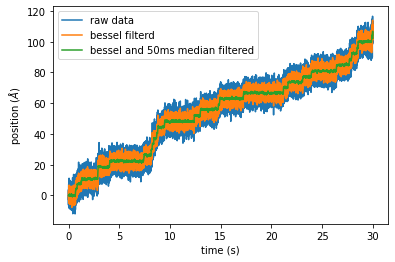

In [3]:
# Bessel filter
order = 4
fc = 1000.
b, a = signal.bessel(order, fc/fs)
data_bessel = signal.lfilter(b, a, data)

# median filter
medfiltwin = 101  #(~= 50 ms, for a median filter, the window size must be odd)
data_bessel_median = signal.medfilt(data_bessel, medfiltwin)

# Plot the data
time = np.arange(len(data))/fs
plt.plot(time, data, label='raw data')
plt.plot(time, data_bessel, label='bessel filterd')
plt.plot(time, data_bessel_median, label='bessel and 50ms median filtered')
plt.ylabel('position ($\AA$)')
plt.xlabel('time (s)')
plt.legend()

The authors next made a histogram of the position data, using a histogram bin size of 0.1 angstrom. They then autocorrelated the histogram, calculated the power spectrum of the autocorrelation, then smoothed the power spectrum with a 5 point binomial filter.

Text(0.5, 1.0, 'power spectrum of autocorrelation')

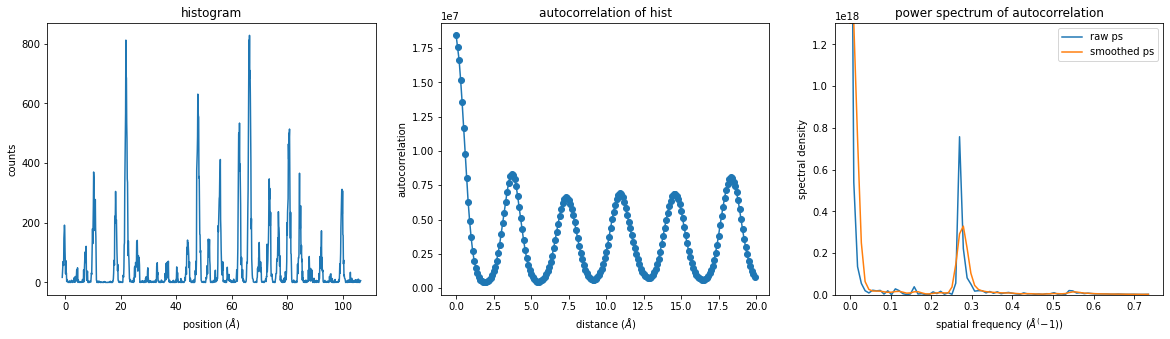

In [4]:
# calculate histogram
hist, bin_edges = np.histogram(data_bessel_median, bins = int(np.ptp(data_bessel_median)*10))

# autocorrelation of histogram
ac = np.correlate(hist, hist, mode='full')
ac = ac[ac.size//2:]
ac_dist = np.arange(len(ac))/ 10  # in angstroms -- remember, the bins of our hist were 0.1 angstrom

# power spectrum of autocorrelation
ps = np.abs(np.fft.fft(ac))**2
freqs = np.fft.fftfreq(ac.size, ac_dist[1])
idx = np.argsort(freqs)
freqs, ps = freqs[idx], ps[idx]

# smooth the power spectrum (don't worry too much about the details of the binomial filter)
def binomcoeffs(n): 
    return (np.poly1d([0.5, 0.5])**n).coeffs
ps_smoothed = np.convolve(ps, binomcoeffs(5),mode='same')

# some plots
fig, axes = plt.subplots(1, 3)
ax = axes.ravel()
fig.set_size_inches((20, 5))

ax[0].plot(bin_edges[0:-1]+bin_edges[1]/2,hist)
ax[0].set_ylabel('counts')
ax[0].set_xlabel('position ($\AA$)')
ax[0].set_title('histogram')

ax[1].plot(ac_dist[:200], ac[:200],'o-')
ax[1].set_xlabel('distance ($\AA$)')
ax[1].set_ylabel('autocorrelation')
ax[1].set_title('autocorrelation of hist')

pltidx = [int(len(freqs)/2), int(len(freqs)/2 + 80)]
ax[2].plot(freqs[pltidx[0]:pltidx[1]], ps[pltidx[0]:pltidx[1]], label='raw ps')
ax[2].plot(freqs[pltidx[0]:pltidx[1]], ps_smoothed[pltidx[0]:pltidx[1]], label='smoothed ps')
ax[2].set_xlabel('spatial frequency ($\AA^(-1)$)')
ax[2].set_ylabel('spectral density')
ax[2].set_ylim(0,np.max(ps_smoothed[pltidx[0]:pltidx[1]]))
plt.legend()
ax[2].set_title('power spectrum of autocorrelation')

### 5- Further reading

Now that you know everything about optical tweezers, you can read on the following resources that will help you understand when and how they're is used in real life!

If you did not do the `Advanced` modules, please choose one of these papers and read in detail.

- [Review of single molecule force spectroscopy](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3397402/) 
- [Thorough primer and review of OT](https://www.nature.com/articles/s43586-021-00021-6.pdf)
- more examples of measuring steps of molecular motors: [iBiology, Carlos Bustamante, lecture III](https://www.youtube.com/watch?v=u1vRo4-dD20) (the rest of the video)

And for fun, if you want to watch the acceptance speech of Arthur Ashkin for the shared 2018 Nobel prize in physics:
- [the official speeach delivered by René-Jean Essiambre](https://www.youtube.com/watch?v=wAGOArzsEmQ)
- [the speech delivered by Arthur Ashkin](https://www.youtube.com/watch?v=vb58pd2ycKQ)
